# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

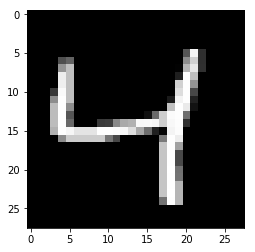

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
encoding_dim = 32 # Size of the encoding layer (the hidden layer)

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu) # Output of hidden layer
logits = tf.layers.dense(encoded, image_size, activation=None) # Output layer logits

decoded = tf.nn.sigmoid(logits, name='output') # Sigmoid output
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6939
Epoch: 1/20... Training loss: 0.6908
Epoch: 1/20... Training loss: 0.6875
Epoch: 1/20... Training loss: 0.6837
Epoch: 1/20... Training loss: 0.6799
Epoch: 1/20... Training loss: 0.6744
Epoch: 1/20... Training loss: 0.6676
Epoch: 1/20... Training loss: 0.6605
Epoch: 1/20... Training loss: 0.6509
Epoch: 1/20... Training loss: 0.6412
Epoch: 1/20... Training loss: 0.6288
Epoch: 1/20... Training loss: 0.6171
Epoch: 1/20... Training loss: 0.6007
Epoch: 1/20... Training loss: 0.5860
Epoch: 1/20... Training loss: 0.5676
Epoch: 1/20... Training loss: 0.5520
Epoch: 1/20... Training loss: 0.5345
Epoch: 1/20... Training loss: 0.5155
Epoch: 1/20... Training loss: 0.4970
Epoch: 1/20... Training loss: 0.4795
Epoch: 1/20... Training loss: 0.4617
Epoch: 1/20... Training loss: 0.4514
Epoch: 1/20... Training loss: 0.4334
Epoch: 1/20... Training loss: 0.4180
Epoch: 1/20... Training loss: 0.4027
Epoch: 1/20... Training loss: 0.3866
Epoch: 1/20... Training loss: 0.3833
E

Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1840
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1833
Epoch: 1/20... Training loss: 0.1827
Epoch: 1/20... Training loss: 0.1788
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1775
Epoch: 1/20... Training loss: 0.1773
Epoch: 1/20... Training loss: 0.1865
E

Epoch: 2/20... Training loss: 0.1472
Epoch: 2/20... Training loss: 0.1464
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1452
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1490
Epoch: 2/20... Training loss: 0.1491
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1479
Epoch: 2/20... Training loss: 0.1463
Epoch: 2/20... Training loss: 0.1448
Epoch: 2/20... Training loss: 0.1479
Epoch: 2/20... Training loss: 0.1483
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1469
Epoch: 2/20... Training loss: 0.1423
Epoch: 2/20... Training loss: 0.1462
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1463
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1454
Epoch: 2/20... Training loss: 0.1481
E

Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1259
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1255
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1304
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1309
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1303
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1285
Epoch: 3/20... Training loss: 0.1285
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1301
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1310
E

Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1193
E

Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1090
E

Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1105
Epoch: 6/20... Training loss: 0.1105
Epoch: 6/20... Training loss: 0.1104
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1100
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1046
E

Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0956
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1061
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1071
E

Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0957
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0989
E

Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0935
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0978
E

Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.1014
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.1009
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0966
E

Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0993
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0997
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0994
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0887
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0984
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0870
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0892
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0884
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0976
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

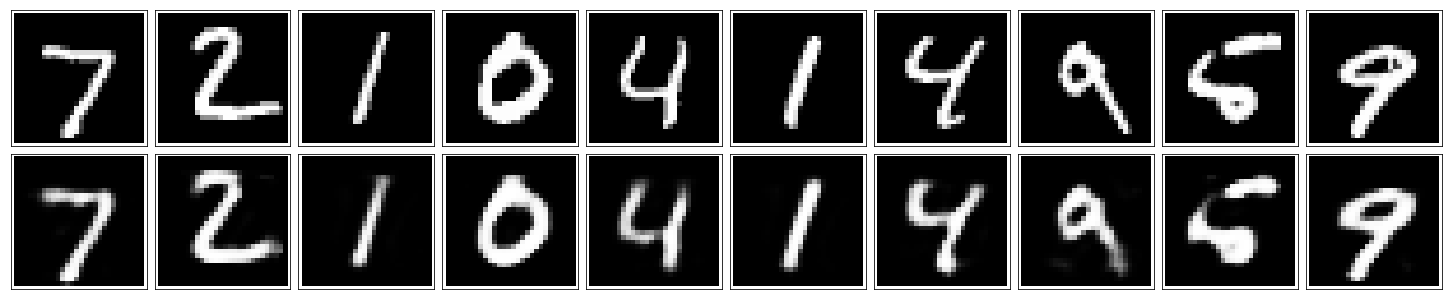

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.